In [4]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

train_generator = train_datagen.flow_from_directory('dataset/train',
                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                   batch_size=32,
                                  class_mode='sparse',
                                  save_to_dir='AugmentedImages',)

Found 1506 images belonging to 3 classes.


In [18]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = test_datagen.flow_from_directory('dataset/test',
                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                   batch_size=32,
                                  class_mode='sparse')

Found 431 images belonging to 3 classes.


In [19]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

val_generator = val_datagen.flow_from_directory('dataset/val',
                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                   batch_size=32,
                                  class_mode='sparse')

Found 215 images belonging to 3 classes.


In [20]:
input_size = (None, 256, 256, 3)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_size),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size =(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_size)

In [21]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [24]:
1506/32

47.0625

In [26]:
215/32

6.71875

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    validation_data=val_generator,
    validation_steps=6,
    batch_size=32 ,
    verbose=1,
    epochs=20
)

Epoch 1/20


/Users/sheetals/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.4550 - loss: 0.9811

/Users/sheetals/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 639ms/step - accuracy: 0.4674 - loss: 0.9292 - val_accuracy: 0.4635 - val_loss: 0.8357
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 24s 525ms/step - accuracy: 0.4375 - loss: 0.7915

/Users/sheetals/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4375 - loss: 0.7915 - val_accuracy: 0.4479 - val_loss: 0.8723
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 537ms/step - accuracy: 0.6316 - loss: 0.7609 - val_accuracy: 0.6667 - val_loss: 0.7345
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6562 - loss: 0.7332 - val_accuracy: 0.6719 - val_loss: 0.7371
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 572ms/step - accuracy: 0.7157 - loss: 0.6096 - val_accuracy: 0.7448 - val_loss: 0.5542
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8750 - loss: 0.3388 - val_accuracy: 0.7396 - val_loss: 0.5852
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 509ms/step - accuracy: 0.7924 - loss: 0.4589 - val_accuracy: 0.7969 - val_loss: 0.4778
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8438 - loss: 0.4709 - val_accuracy: 0.8490 - val_loss: 0.3734
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 507ms/step - accuracy: 0.8867 - loss: 0.2910 - val_accuracy: 0.7969 - val_

In [30]:
score  = model.evaluate(test_generator )
score

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9652 - loss: 0.0759


[0.07593095302581787, 0.9651972055435181]

In [33]:
len(history.history['loss'])

20

In [34]:
len(history.history['val_loss'])

20

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

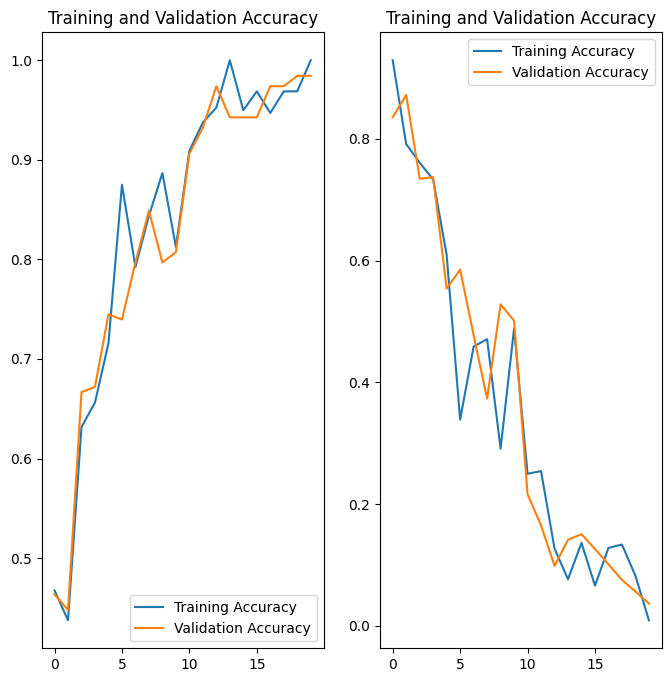

In [36]:
plt.figure(figsize=(8, 8))
plt. subplot (1, 2, 1)
plt. plot(range(20), acc, label='Training Accuracy')
plt. plot(range(20), val_acc, label='Validation Accuracy')
plt. legend (loc='lower right')
plt.title('Training and Validation Accuracy')

plt. subplot (1, 2, 2)
plt. plot(range(20), loss, label='Training Accuracy')
plt. plot(range(20), val_loss, label='Validation Accuracy')
plt. legend (loc='upper right')
plt.title('Training and Validation Accuracy')

In [38]:
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
predicted label: Potato___Early_blight


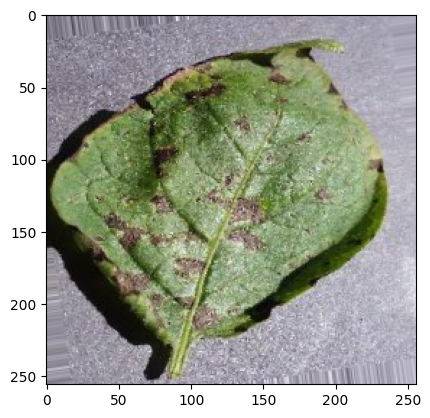

In [39]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


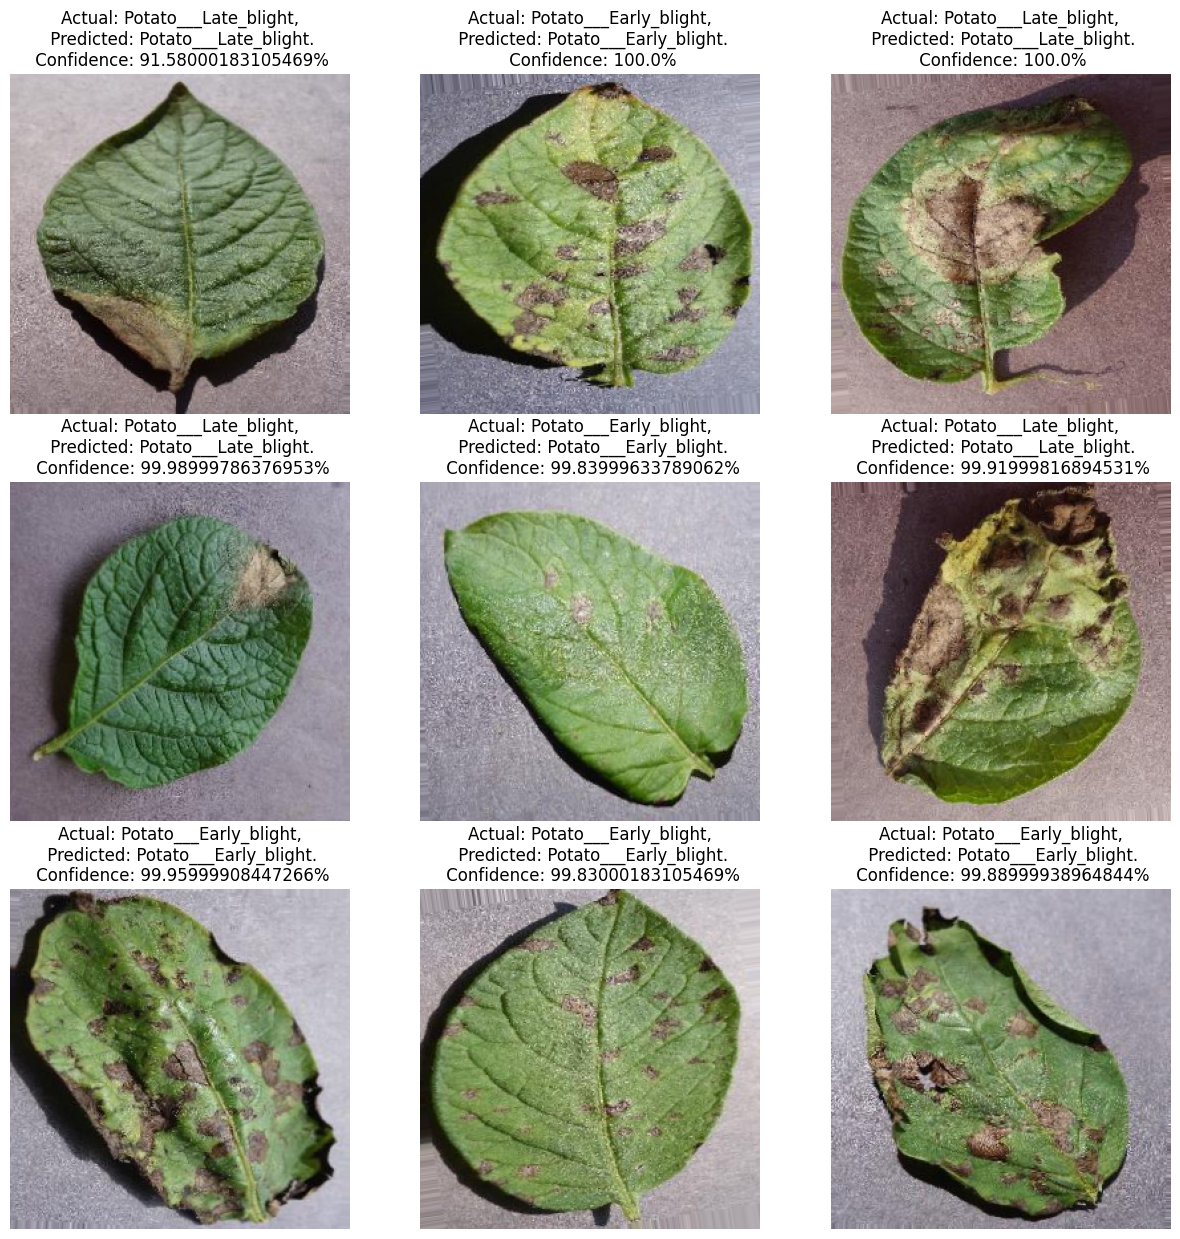

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [42]:
model.save("../potatoes.h5")